In [0]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torchvision.utils as vutils
import torch.optim as optim
from torch.utils.data import Dataset

from torch.utils.data import DataLoader
from torch.autograd import Variable

In [0]:
from torchvision.datasets import STL10
from skimage import io, color
from PIL import Image

class STL10GrayColor(STL10):
    def grayscale(self) :
        pass

    def __getitem__(self, index):
        """
        Overwrite the original method to return a grayscaled image and
        the same image with the colors.
        
        Input:
            index(int): index of the desired image
            
        Return:
            tensor_gray_img(torch.Tensor): image in black and white
            tensor_img(torch.Tensor): image in RGB
        """
        img = self.data[index]
        
        
        
        img = Image.fromarray(np.transpose(img, (1, 2, 0)))

        if self.transform is not None:
            img = self.transform(img)
            
            # Convert img RGB -> Lab
            lab_img = color.rgb2lab(img)
            
            # Transpose the lab img: dim 128x128x3 -> 3x128x128
            L, a, b = np.transpose(lab_img, (2, 0, 1))
            
            # Normalize
            gray_img = (L + 128) / 255
            color_img = np.asarray(img) / 255
            
            # Transform numpy array to torch tensor
            tensor_gray_img = torch.tensor(gray_img)
            tensor_img = torch.from_numpy(np.transpose(color_img, (2, 0, 1)))
            

        return (tensor_gray_img, tensor_img)

In [0]:
# Image preprocessing
transform = transforms.Compose([transforms.Resize(128)])

transform2 = transforms.Compose([transforms.Resize(128),
                                 transforms.ToTensor()])


# transforms.ToTensor()

In [109]:
# Load STL10 dataset
stl10_trainset = STL10GrayColor(root="./data",
                                split='train',
                                download=True,
                                transform=transform)

new_stl = STL10(root="./data",
              split='train',
              download=True,
              transform=transform2)

# Parameters
params_loader = {'batch_size': 256,
                 'shuffle': False}

train_loader = DataLoader(stl10_trainset, **params_loader)

new_loader = DataLoader(new_stl, **params_loader)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_img(images):
    f, a = plt.subplots(1, len(images), figsize=(14, 6))
    
    for i, image in enumerate(images):
        # img = image.permute(1, 2, 0).numpy()
        a[i].imshow(image, cmap=plt.cm.gray)
        
        a[i].set_xticks(())
        a[i].set_yticks(())
    

    plt.show()


torch.Size([256, 3, 128, 128])


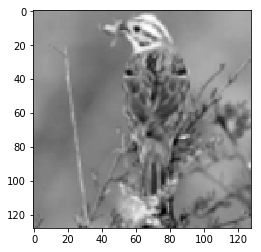

In [115]:
for gray_img, original_img in train_loader:
    # img = image[0].permute(1, 2, 0).numpy()
    # plot_img(image[:5])
    # print(img.shape)
    # print(img)
    # plt.imshow(img)
    # 
    # lab_img = color.rgb2lab(img)
    # print(lab_img.shape)
    # new_img = np.transpose(lab_img, (2, 0, 1))
    # 
    # L, a, b = new_img
    # 
    # other_gray = color.rgb2grey(img)
    # 
    # gray = (L+128)/255
    # 
    # plot_img([gray, other_gray])
    # 
    # 
    # reconstructed = np.array([gray*255-127, a, b])
    # trans_rec = np.transpose(reconstructed, (1, 2, 0))
    # print(trans_rec.shape)
    # 
    # plt.imshow(color.lab2rgb(trans_rec))
    # print(image.shape)

    plt.imshow(gray_img[0], cmap=plt.cm.gray)

    vutils.save_image(original_img,
                      './original_sample.png')
    break
    
for img, _ in new_loader:
    print(img.shape)
    vutils.save_image(img,
                     './test.png')
    break


In [0]:
from torchvision import models
vgg = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
553433881it [00:07, 69986417.12it/s]


In [0]:
vgg.features[0].in_channels = 1

vgg

VGG(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

24576